In [2]:
!pip install -q tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 43.5 MB/s eta 0:00:00


In [21]:
### ZAD 1

import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras


def sample_images(images, row_count, column_count):
    fig, axs = plt.subplots(row_count, column_count, figsize=(10,10))
    for i in range(row_count):
        for j in range(column_count):
            axs[i,j].imshow(images[i * column_count + j])
            axs[i,j].axis('off')
    plt.show()

(train, train_labels), (test, test_labels) = tf.keras.datasets.mnist.load_data()

train = train.reshape(-1, 28 * 28) / 255.0
test = test.reshape(-1, 28 * 28) / 255.0

model = tfdf.keras.RandomForestModel(num_trees=30)
model.compile(metrics=["accuracy"])
model.fit(train, 
          train_labels,  
          validation_data=(test, test_labels))  

model.evaluate(test, test_labels)


Use /tmp/tmp972jfjyb as temporary training directory
Reading training dataset...
Training dataset read in 0:00:15.152642. Found 60000 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(10000, shape=(), dtype=int32)
Validation dataset read in 0:00:13.986966. Found 10000 examples.
Training model...
Model trained in 0:01:01.527069
Compiling model...
Model compiled.
313/313 [==============================] - 5s 6ms/step - loss: 0.0000e+00 - accuracy: 0.9629


[0.0, 0.9628999829292297]

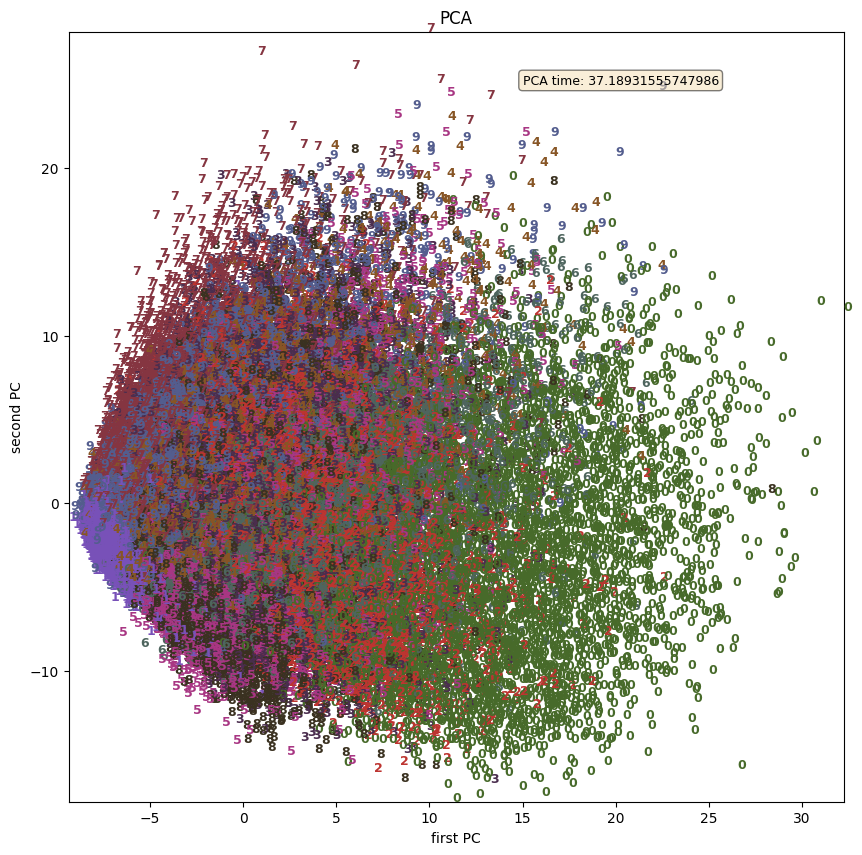

number of clusters in pca-DBSCAN:  1


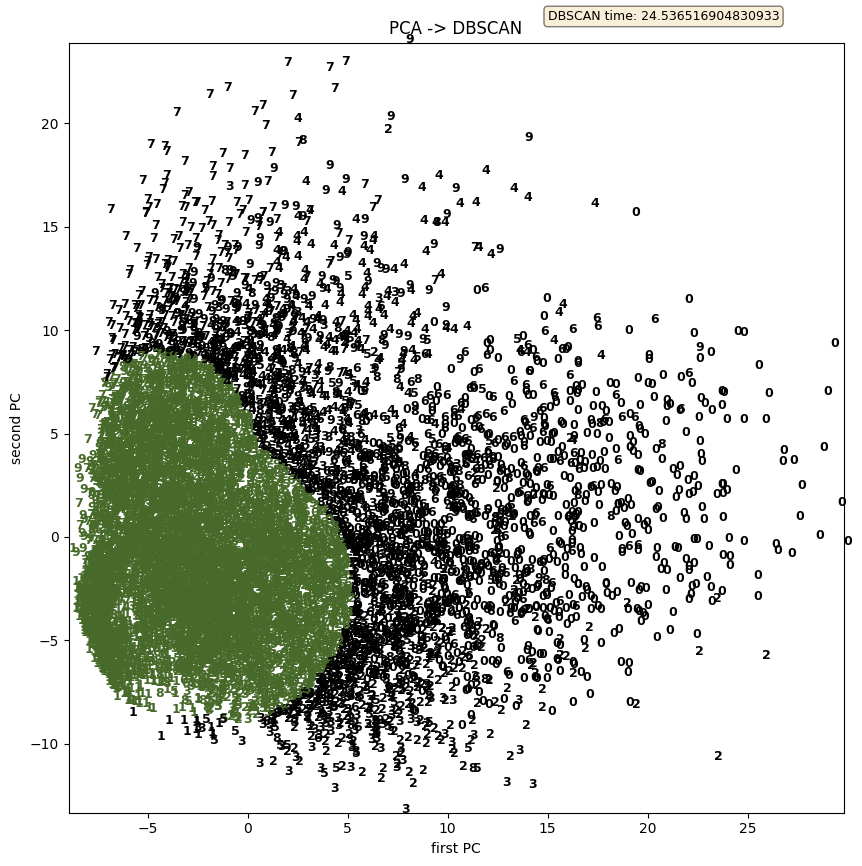

DBSCAN time:  37.896404504776


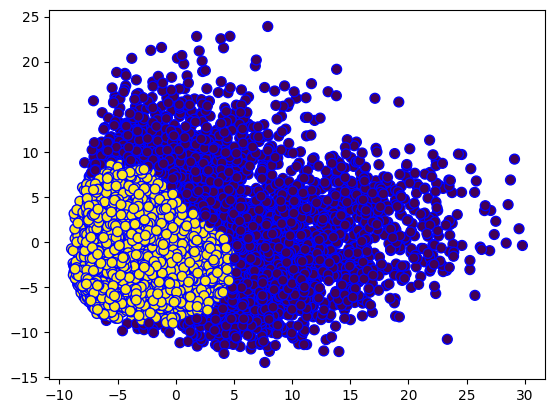

In [31]:
### ZAD 2

from time import time
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

colors = ["#476A2A","#7851B8",'#BD3430','#4A2D4E','#875525',
          '#A83683','#4E655E','#853541','#3A3120','#535D8E', 'black'] 


#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#PCA
t=time()
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
train_pca = pca.fit_transform(x_train, y_train)
test_pca = pca.fit_transform(x_test, y_test)

plt.figure(figsize=(10,10))
plt.xlim(train_pca[:,0].min(), train_pca[:,0].max())
plt.ylim(train_pca[:,1].min(), train_pca[:,1].max())
for i in range(len(x_train)):
    plt.text(train_pca[i,0], train_pca[i,1], str(y_train[i]),
             color = colors[y_train[i]],
             fontdict={'weight':'bold', 'size':9})
plt.title('PCA')
plt.xlabel("first PC")
plt.ylabel("second PC")
plt.text(15, 25, str("PCA time: {}".format(time()-t)),
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=9)
plt.show()


###############
############## PARAMETRY AAAAAAAAAAAAAA TUUUUUU ZMIENIAAAAAASZ
###############

sample_group_size = 1000
distance_to_consider = 3

#PCA -> DBSCAN
t=time()
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=distance_to_consider, min_samples=sample_group_size)
db = db.fit(train_pca)
labels_db = db.labels_
clusters_db = db.fit_predict(test_pca)
n_clusters_ = len(set(clusters_db)) - (1 if -1 in clusters_db else 0)
print("number of clusters in pca-DBSCAN: ", n_clusters_)

#DBSCAN visualization
plt.figure(figsize=(10,10))
plt.xlim(test_pca[:,0].min(), test_pca[:,0].max())
plt.ylim(test_pca[:,1].min(), test_pca[:,1].max())
for i in range(len(y_test)):
    plt.text(test_pca[i,0], test_pca[i,1], str(y_test[i]),
             color = colors[clusters_db[i]],
             fontdict={'weight':'bold', 'size':9})
plt.title('PCA -> DBSCAN')
plt.xlabel("first PC")
plt.ylabel("second PC")
plt.text(15, 25, str("DBSCAN time: {}".format(time()-t)),
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         fontsize=9)
plt.show()
print("DBSCAN time: ", time()-t)
plt.scatter(test_pca[:,0], test_pca[:,1], c=clusters_db, s=50, edgecolors='b')